# DATA DESCRIPTION

#### The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. 
#### This dataset contains :
* Employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas –
cognitive skills, technical skills and personality skills.
* demographic features
* contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

## Problem statement

* Who got the highest /lowest salary over all the candidates ?
* In which city the job postings happened more frequently?
* Which Designation has more demand? 
* Overall Which gender is more?
* Who secured more percentage in 10th, Inter, Graduation?
* Year wise Graduated people?
* In which state there are more Graduate passedouts?
* In Which Specialization people got the jobs more?
* More People are getting settled in which age?

In [1]:
# To execute the multiple lines of code at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [3]:
df=pd.read_excel('aspiring_minds_employability_outcomes_2015.xlsx')

In [4]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 39)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
df.describe()


,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
df.set_index("ID",inplace=True)
df.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
203097,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
579905,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
810601,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
267447,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
343523,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


## Data preprocessing

In [9]:
df.isna().sum()

Unnamed: 0               0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [10]:
df.isin([-1,'NaN']).sum()

Unnamed: 0                  0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [11]:
df['JobCity']=df['JobCity'].replace(-1,'Bangalore')


In [12]:
df['JobCity'].value_counts()


Bangalore      1088
Noida           368
Hyderabad       335
Pune            290
Chennai         272
               ... 
Kolkata`          1
Bahadurgarh       1
Panchkula         1
BANGLORE          1
Mainpuri          1
Name: JobCity, Length: 338, dtype: int64

In [13]:
df['Domain'].value_counts()


-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.021066      1
 0.965327      1
 0.027815      1
 0.885704      1
 0.282788      1
Name: Domain, Length: 243, dtype: int64

In [14]:
df['ComputerProgramming'].value_counts()


-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 494      1
 554      1
 840      1
 105      1
 214      1
Name: ComputerProgramming, Length: 79, dtype: int64

In [15]:
df['Domain']=df['Domain'].astype(str).replace('-1.0','0.510490').astype(float)

In [16]:
df['ComputerProgramming']=df['ComputerProgramming'].astype(str).replace('-1','353').astype(int)


In [17]:
df['Domain'].value_counts()


0.510490    246
0.622643    113
0.538387    110
0.486747    106
0.744758    103
           ... 
0.021066      1
0.965327      1
0.027815      1
0.885704      1
0.282788      1
Name: Domain, Length: 243, dtype: int64

In [18]:
df['ComputerProgramming'].value_counts()

353    868
445    151
435    144
475    139
465    134
      ... 
494      1
554      1
840      1
105      1
214      1
Name: ComputerProgramming, Length: 79, dtype: int64

In [19]:
df.isin([-1,'NaN']).sum()

Unnamed: 0                  0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [20]:
df['DOB']=pd.to_datetime(df['DOB'])
df['DOB_year']=df['DOB'].dt.year
df.drop(columns=['DOB'],axis=1,inplace=True)


In [21]:
df['GradAge']=abs(df['GraduationYear']-df['DOB_year'])

In [22]:
# Dropping the unnecessary columns
df.drop(columns = ['Unnamed: 0','DOJ', 'DOL','DOB_year','CollegeID','CollegeCityID','CollegeTier','CollegeCityTier','ComputerScience','ElectronicsAndSemicon','MechanicalEngg',
                        'ElectricalEngg','TelecomEngg','CivilEngg'],axis = 1,inplace=True)

In [23]:
Final_df = df[['Salary','Designation', 'JobCity', 'Gender','10percentage', '10board', '12graduation','12percentage', '12board','Degree','Specialization','collegeGPA','CollegeState','GraduationYear','GradAge','English', 'Logical',
       'Quant', 'Domain', 'ComputerProgramming', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']]

In [24]:
Final_df=Final_df.reset_index()

In [25]:
Final_df

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,GradAge,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,senior quality engineer,Bangalore,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",B.Tech/B.E.,computer engineering,78.00,Andhra Pradesh,2011,21,515,585,525,0.635979,445,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,assistant manager,Indore,m,85.40,cbse,2007,85.00,cbse,B.Tech/B.E.,electronics and communication engineering,70.06,Madhya Pradesh,2012,23,695,610,780,0.960603,353,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,systems engineer,Chennai,f,85.00,cbse,2010,68.20,cbse,B.Tech/B.E.,information technology,70.00,Uttar Pradesh,2014,22,615,545,370,0.450877,395,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,senior software engineer,Gurgaon,m,85.60,cbse,2007,83.60,cbse,B.Tech/B.E.,computer engineering,74.64,Delhi,2011,22,635,585,625,0.974396,615,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,get,Manesar,m,78.00,cbse,2008,76.80,cbse,B.Tech/B.E.,electronics and communication engineering,73.90,Uttar Pradesh,2012,21,545,625,465,0.124502,353,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,software engineer,New Delhi,m,52.09,cbse,2006,55.50,cbse,B.Tech/B.E.,information technology,61.50,Haryana,2010,23,365,334,475,0.276047,345,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,technical writer,Hyderabad,f,90.00,state board,2009,93.00,state board,B.Tech/B.E.,electronics and communication engineering,77.30,Telangana,2013,21,415,410,535,0.881620,325,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,associate software engineer,Bangalore,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",B.Tech/B.E.,computer engineering,70.00,Orissa,2012,21,475,475,465,0.488348,405,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,software developer,Asifabadbanglore,f,78.72,state board,2010,69.88,state board,B.Tech/B.E.,computer science & engineering,70.42,Karnataka,2014,22,450,410,320,0.744758,445,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [26]:
Final_df.GradAge.unique()

array([  21,   23,   22,   24,   26,   28,   20,   34,   25,   19,   17,
         27,   29, 1991], dtype=int64)

In [27]:
Final_df[Final_df.GradAge==1991]

,ID,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,GradAge,English,Logical,Quant,Domain,ComputerProgramming,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
2664,794381,325000,systems engineer,Chandigarh,m,89.0,cbse,2010,85.2,cbse,B.Tech/B.E.,mechanical engineering,68.76,Uttar Pradesh,0,1991,695,655,680,0.755375,353,1.1336,0.3789,-0.2974,-0.3612,-1.244


In [28]:
Final_df.GradAge=Final_df.GradAge.astype(str).replace('1991','23').astype(int)

In [29]:
Final_df.to_excel(r'C:\Data\train_data.xlsx',index=False)

### Groupby

In [30]:
Final_df.groupby('Designation')[['Salary']].mean()

,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


In [31]:
Final_df.groupby('Designation')[['Salary']].max()


,Salary
Designation,
.net developer,470000
.net web developer,305000
account executive,445000
account manager,350000
admin assistant,105000
...,...
web designer and seo,200000
web developer,340000
web intern,205000


In [32]:
Final_df.groupby(['Gender','Specialization'])[['Salary']].mean()


Salary
Gender Specialization                                        
f      aeronautical engineering                 180000.000000
       applied electronics and instrumentation  287500.000000
       biomedical engineering                   290000.000000
       biotechnology                            247222.222222
       chemical engineering                     100000.000000
...                                                       ...
m      metallurgical engineering                337500.000000
       other                                    266538.461538
       polymer technology                       700000.000000
       power systems and automation             100000.000000
       telecommunication engineering            351000.000000

[71 rows x 1 columns]

In [33]:
import warnings
warnings.filterwarnings('ignore')

## Data Visualization 

### Univariate Analysis

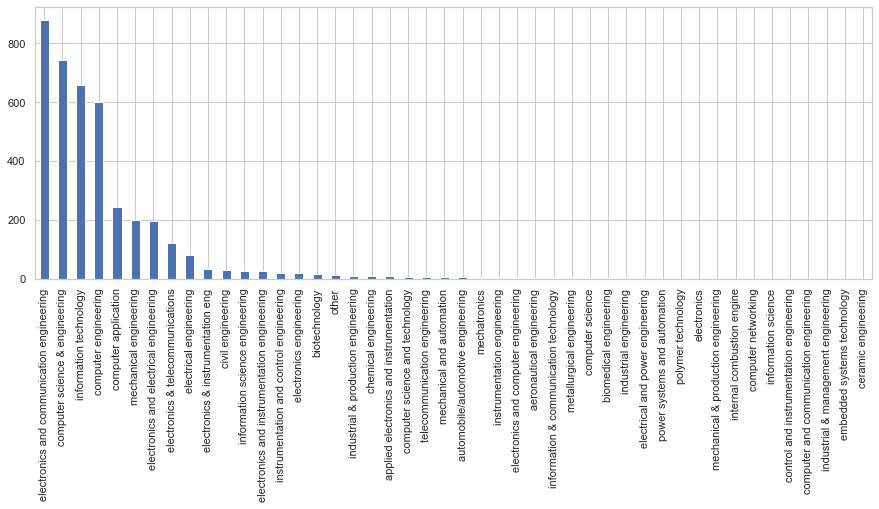

In [34]:
Final_df.Specialization.value_counts().plot(kind='bar',figsize=(15,5));

Observation:
* Electronics and communication engineering people are more getting the job, whereas polymer technology got least.

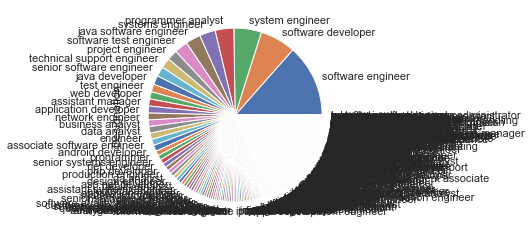

In [35]:
Final_df.Designation.value_counts().plot.pie();

Observation:
 * Software Engineer has more demand while compared to all remaining job roles.

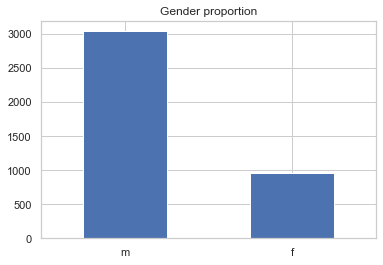

In [36]:
Final_df.Gender.value_counts().plot(kind='bar');
plt.xticks(rotation=0)
plt.title('Gender proportion');

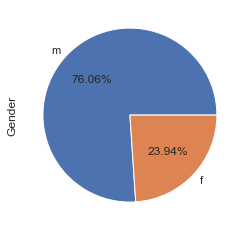

In [37]:
Final_df.Gender.value_counts(normalize=True).plot.pie(autopct='%0.2f%%');

Observation:
* Overall people male candidates are more compared to female ones.

<AxesSubplot:>

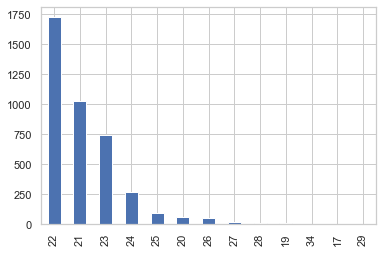

In [38]:
Final_df.GradAge.value_counts().plot(kind='bar')

Observation:
* At the age 22 more people settled in their jobs.

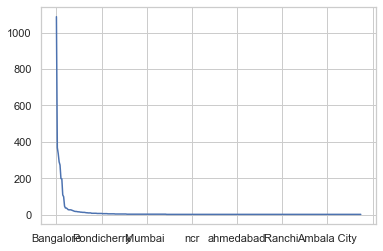

In [39]:
Final_df.JobCity.value_counts().plot.line();

Observation:
* In Bangalore there are more postings occured.

<AxesSubplot:>

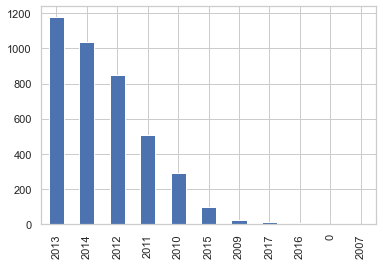

In [40]:
Final_df.GraduationYear.value_counts().plot(kind='bar')

Observation:
* More number of graduates come from the year 2013

<AxesSubplot:ylabel='CollegeState'>

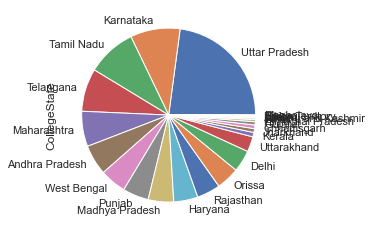

In [41]:
Final_df.CollegeState.value_counts().plot.pie()

Observation:
* From Uttar Pradesh there are more graduates.

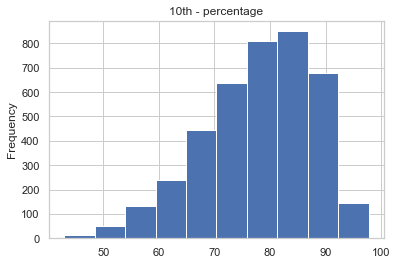

In [42]:
Final_df['10percentage'].plot.hist()
plt.title('10th - percentage');

Observation:
* All candidates percentage in 10th standard between 45 & 95

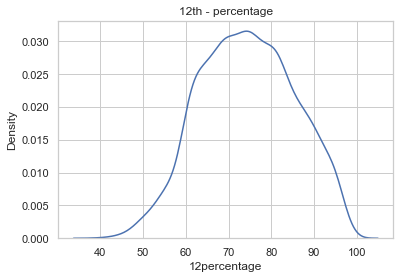

In [43]:
sns.kdeplot(Final_df['12percentage']);
plt.title('12th - percentage');

Observation:
* All candidates percentage in 12th standard around 40 to 100.

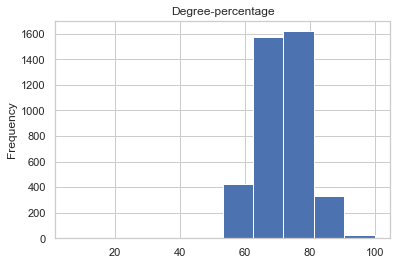

In [44]:
Final_df['collegeGPA'].plot.hist()
plt.title('Degree-percentage');

Observation:
* All candidates percentage in graduate score around 55 to 95

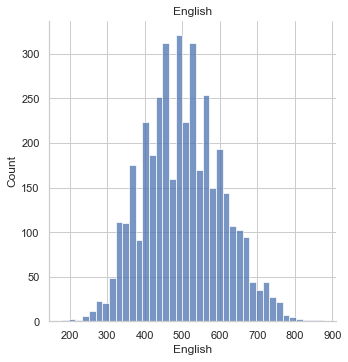

In [45]:
sns.displot(Final_df['English']);
plt.title('English');

Observation:
* Most of the students got score b/w 500 & 600

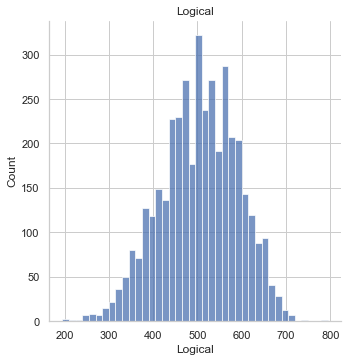

In [46]:
sns.displot(Final_df['Logical']);
plt.title('Logical');

Observation:
* * Most of the students got the marks in *Logical* is  500

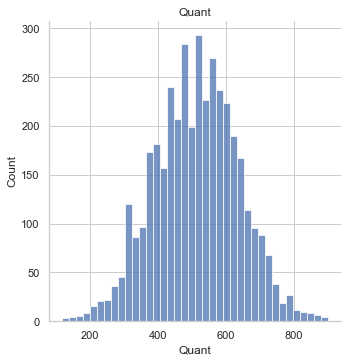

In [47]:
sns.displot(Final_df['Quant']);
plt.title('Quant');

Observation:
* * Most of the students got the marks in *Quant* is 605

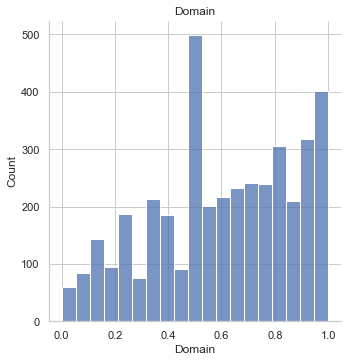

In [48]:
sns.displot(Final_df['Domain']);
plt.title('Domain');

Observation:
* Most of the students got the marks in *Domain* is 0.5

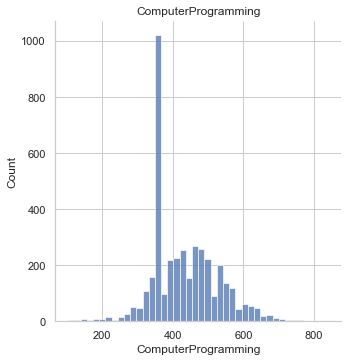

In [49]:
sns.displot(Final_df['ComputerProgramming']);
plt.title('ComputerProgramming');

Observation:
* Most of the students got the marks in *Computer programming* is 353

In [50]:
# row in which value of 'salary less than certian amount
for i in range(1,8):
    seriesObj = Final_df.apply(lambda x: True if x['Salary'] <= 250000*i  else False , axis=1)
    # Count number of True in series
    numOfRows = len(seriesObj[seriesObj == True].index)
 
    print('Number of Rows in dataframe in which Salary %d  : '%((250000*i)), numOfRows)

Number of Rows in dataframe in which Salary 250000  :  1710
Number of Rows in dataframe in which Salary 500000  :  3683
Number of Rows in dataframe in which Salary 750000  :  3929
Number of Rows in dataframe in which Salary 1000000  :  3962
Number of Rows in dataframe in which Salary 1250000  :  3975
Number of Rows in dataframe in which Salary 1500000  :  3981
Number of Rows in dataframe in which Salary 1750000  :  3982


In [51]:
indexNames = Final_df[ Final_df['Salary'] > 1000000 ].index
 
# Delete these row indexes from dataFrame
Final_df.drop(indexNames , inplace=True)
Final_df.shape

(3962, 26)

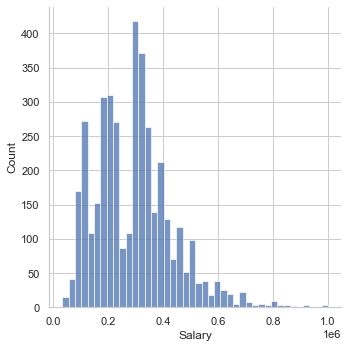

In [52]:
sns.displot(Final_df.Salary);

(array([511., 953., 923., 974., 352., 136.,  68.,  26.,  12.,   7.]),
 array([  35000.,  131500.,  228000.,  324500.,  421000.,  517500.,
         614000.,  710500.,  807000.,  903500., 1000000.]),
 <BarContainer object of 10 artists>)

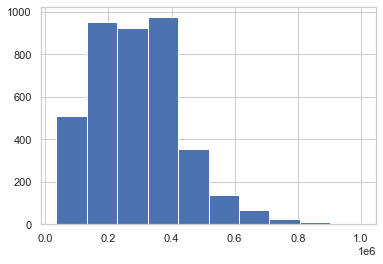

In [53]:
plt.hist(Final_df['Salary'],bins=10)

### Bi-variate

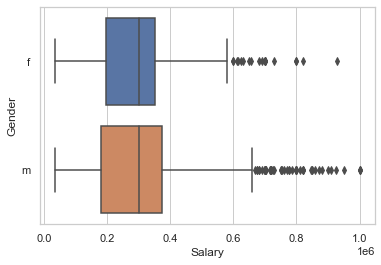

In [54]:
sns.boxplot(x='Salary', y = 'Gender', data=Final_df);

Observation:
* Males earnings are more when compared to females

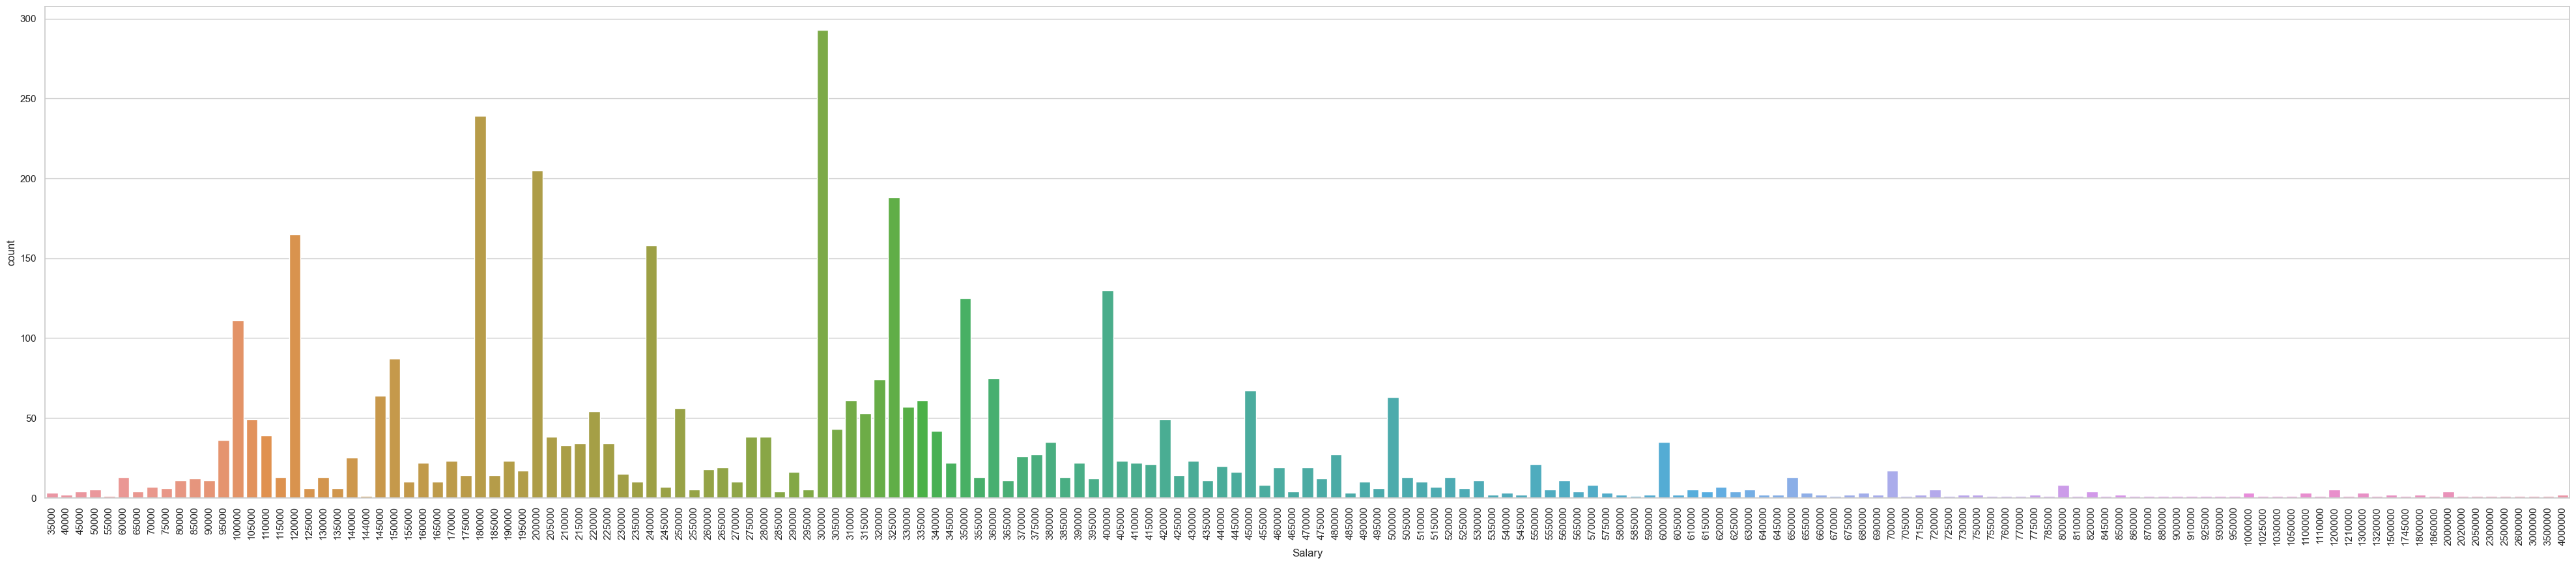

In [55]:
plt.figure(figsize = (50,10),dpi = 100)
sns.countplot(df.Salary)
plt.xticks(rotation=90);

Observation:
* 3L is the frequently occured salary and 35k is minimum salary

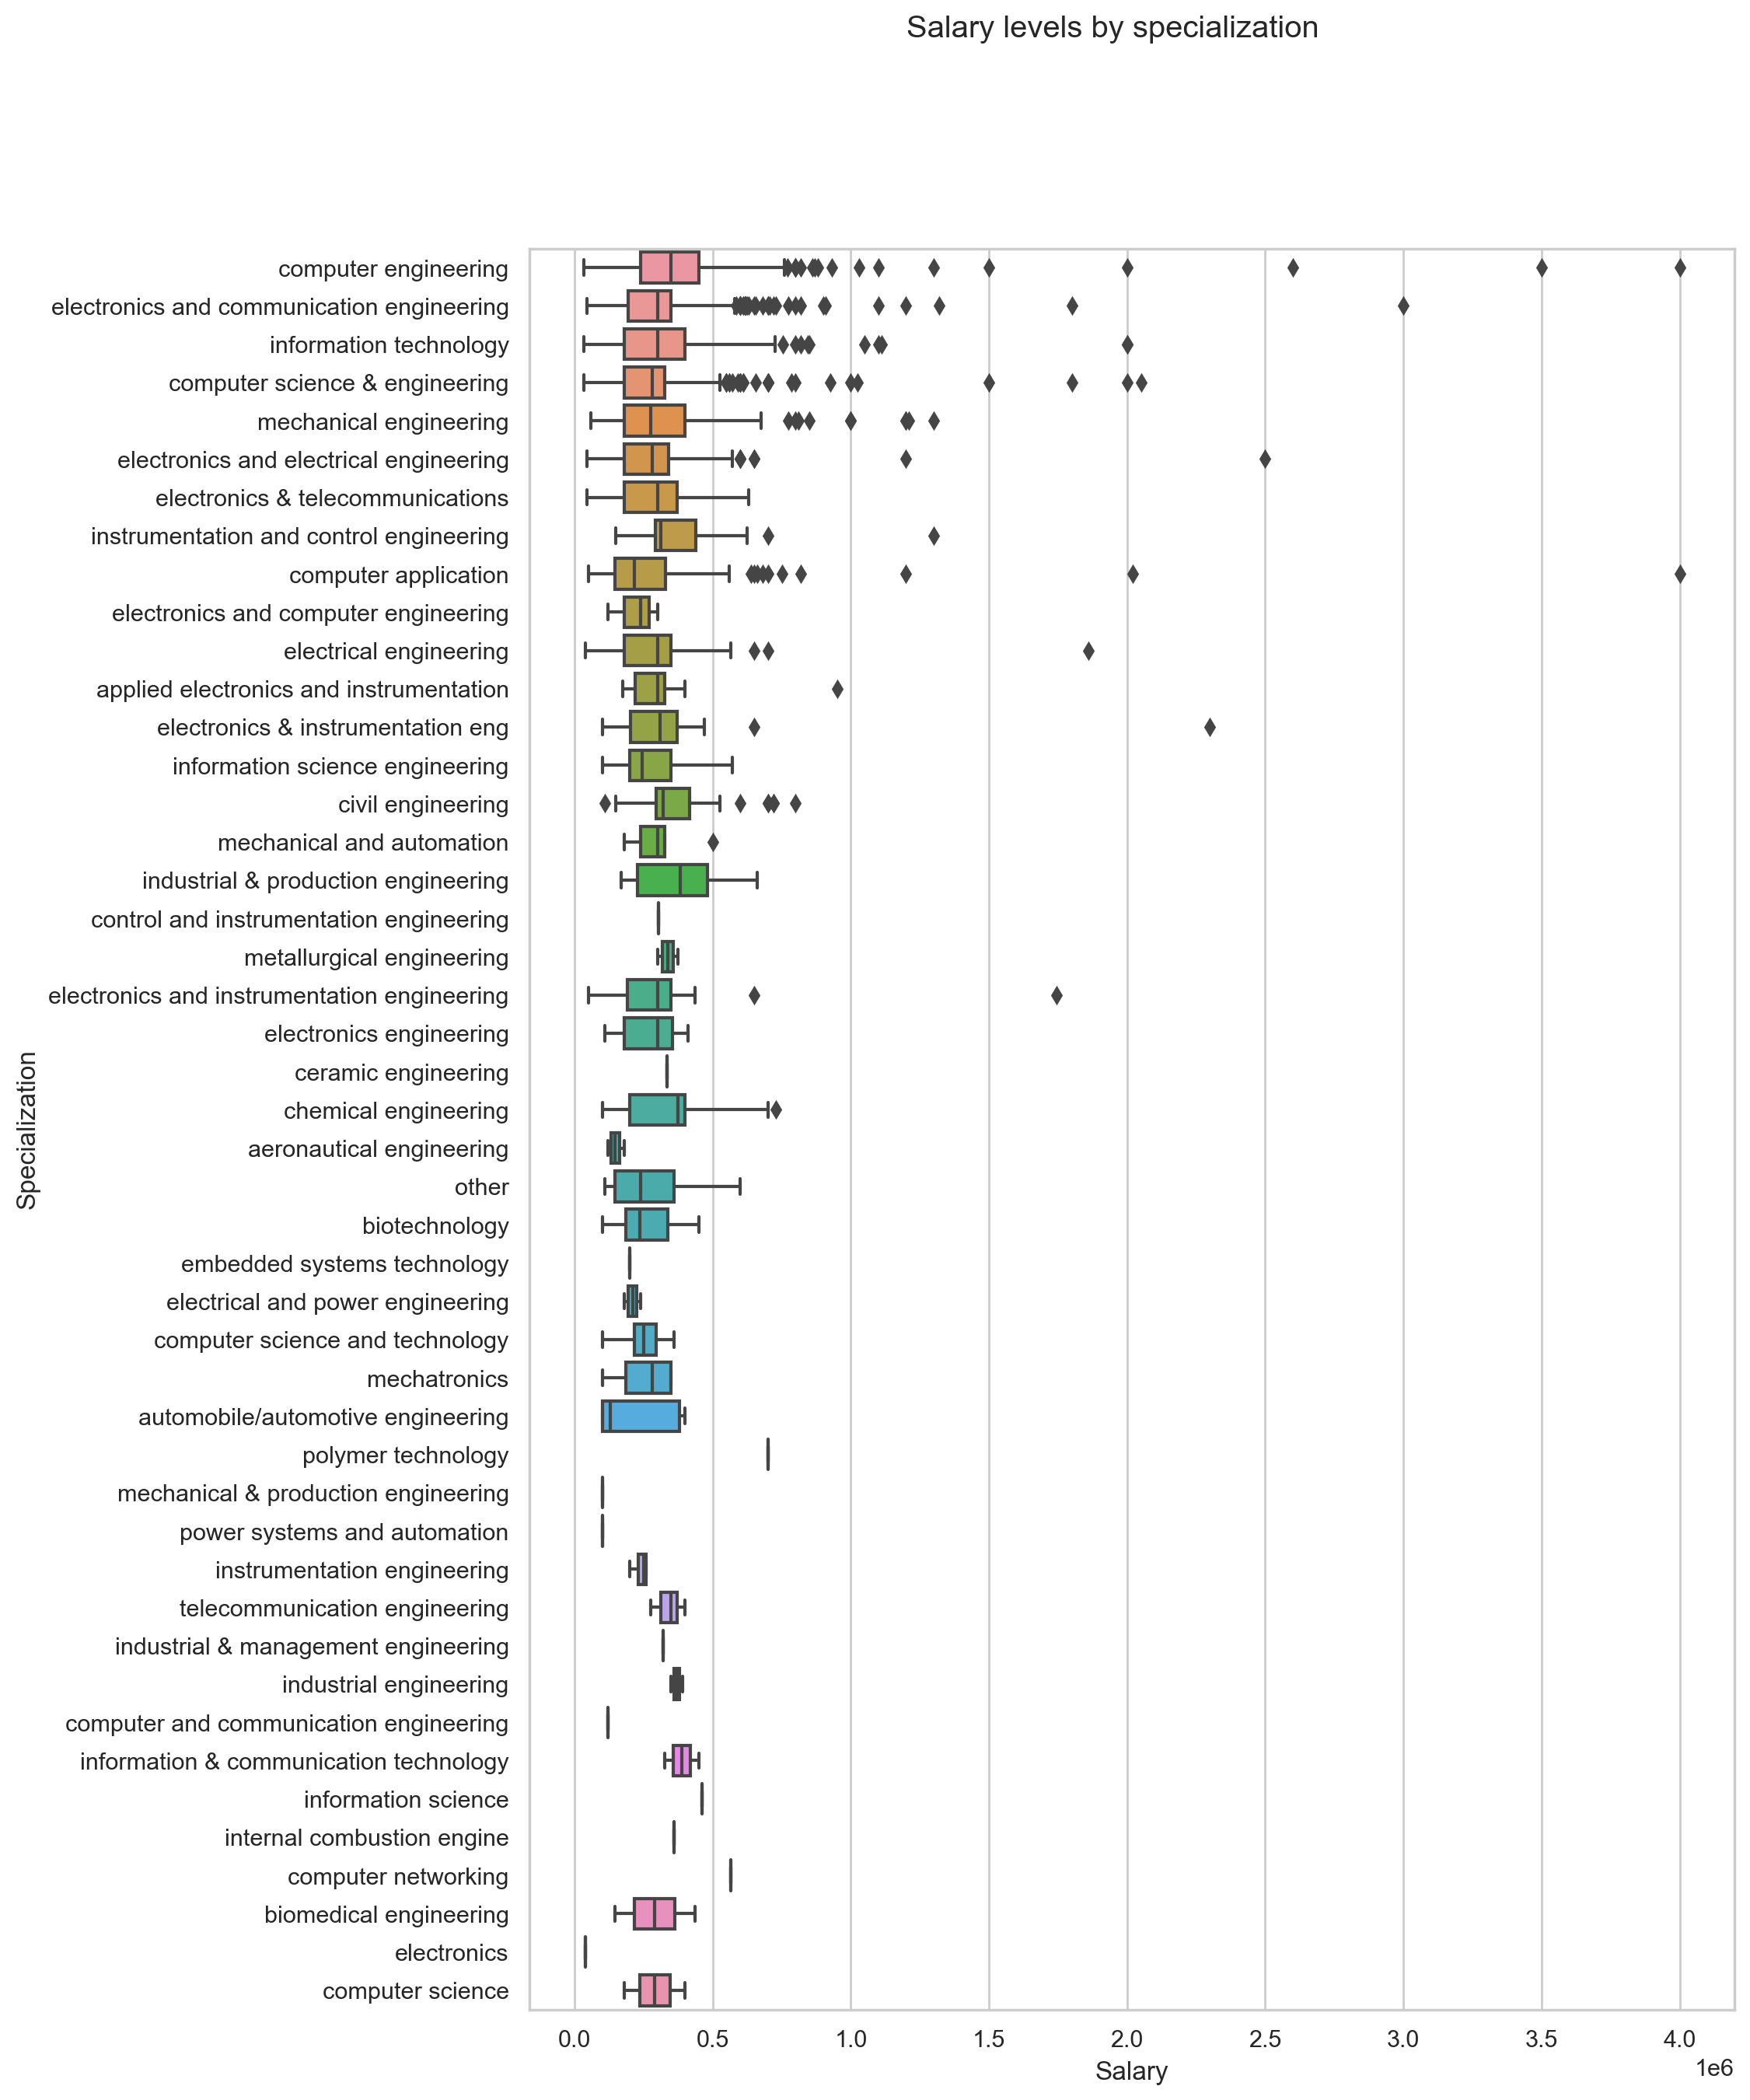

In [62]:
plt.figure(figsize = (10,15),dpi = 200)
sns.boxplot(x='Salary', y = 'Specialization', data=df)
plt.suptitle('Salary levels by specialization');

Obsrvation:
* Computer Engineering graduates get more salary of all others.

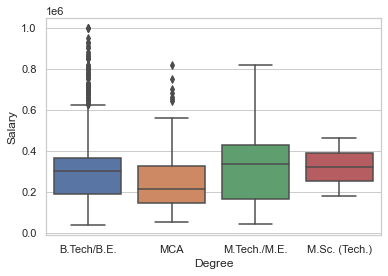

In [57]:
sns.boxplot('Degree','Salary', data=Final_df);


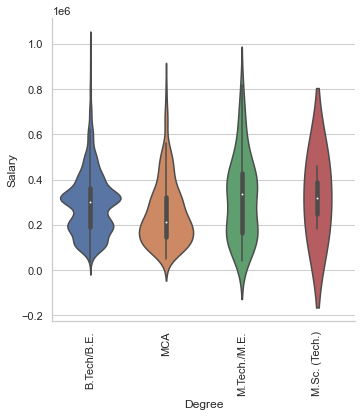

In [58]:
sns.catplot(x = 'Degree', y= 'Salary', data = Final_df, kind='violin');
plt.xticks(rotation=90);

Observation: 
* B.tech/B.E got more increments in salary

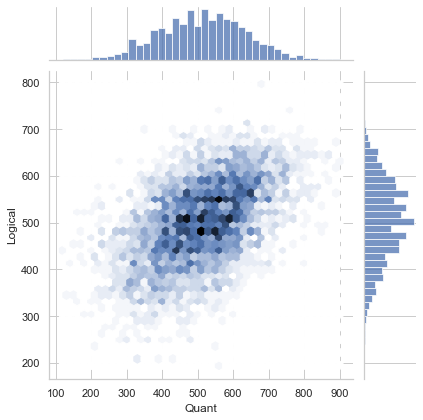

In [59]:
sns.jointplot(x=Final_df.Quant,y=Final_df.Logical,kind='hex');

Observation:
* The average scores in Quant and Logical is 500.

### Multi-variate

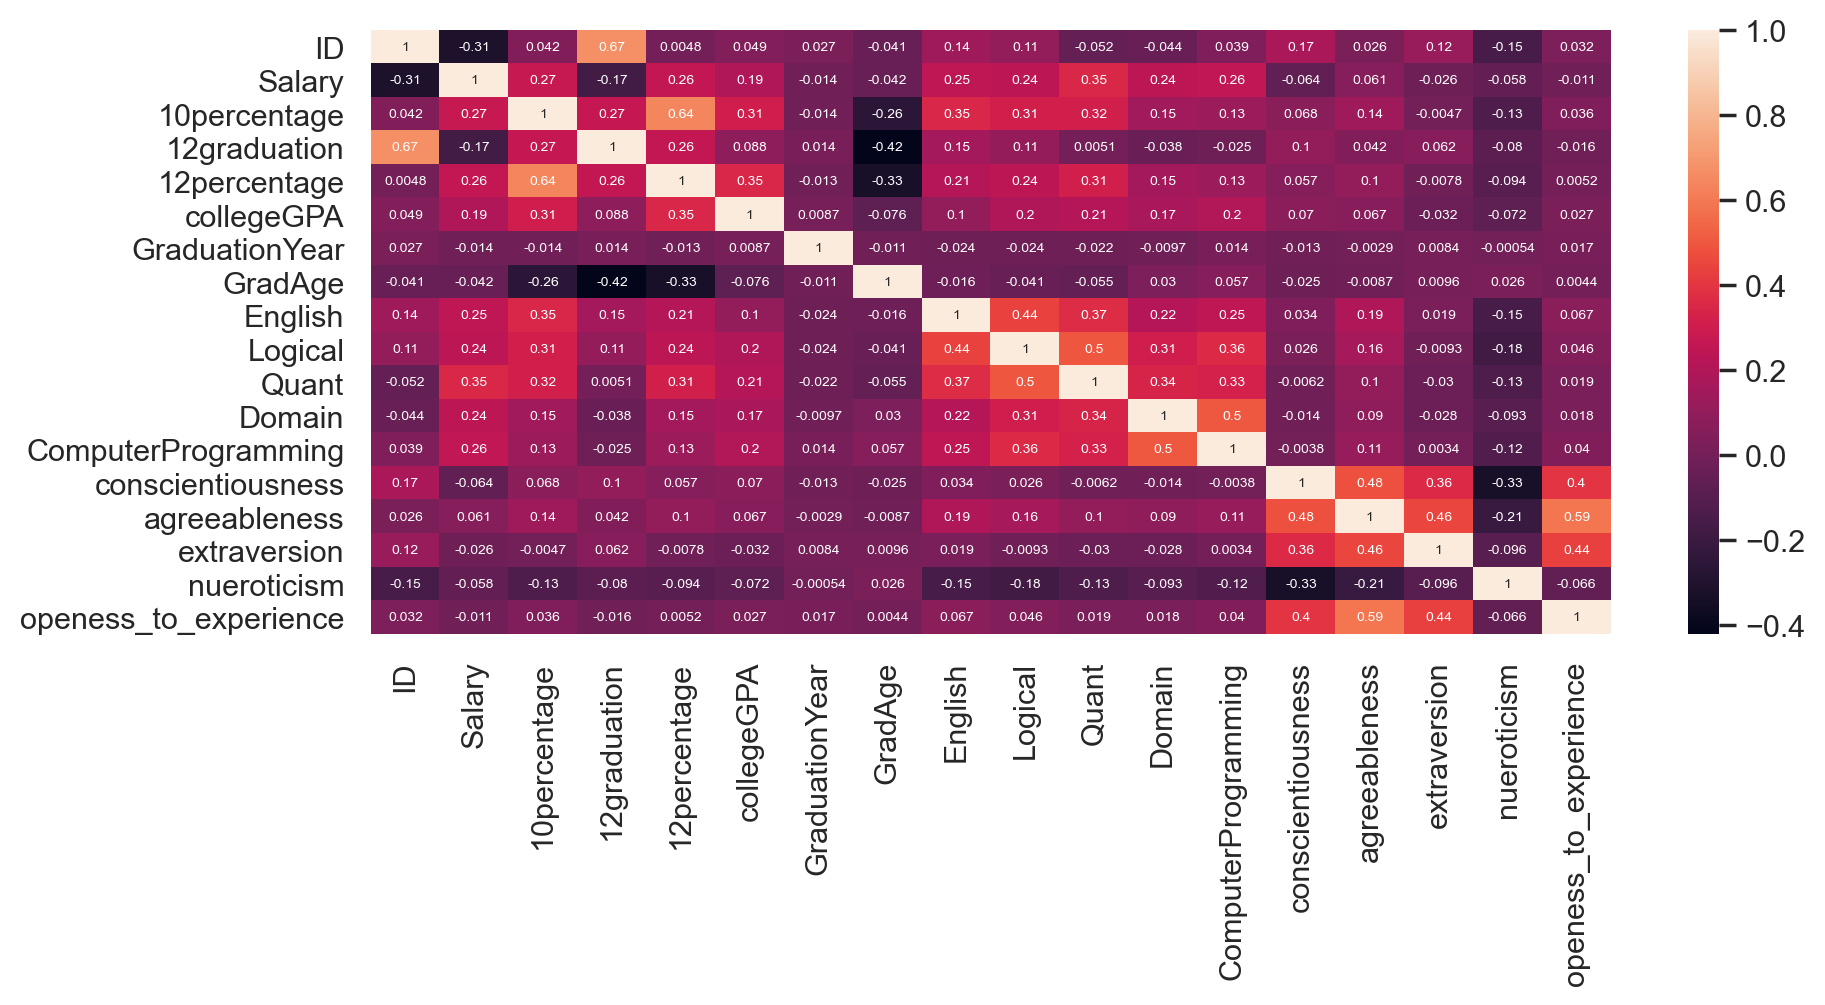

In [60]:
plt.figure(figsize = (10,4),dpi = 200)
sns.heatmap(Final_df.corr(),annot=True,annot_kws={"size": 5});

Observation:
* It shows the all correlated values.

In [61]:
#sns.pairplot(Final_df);

## Conclusion:
* **B.tech/B.E** got more salary, and in that computer Engineers got more.
* In **Bangalore** there are more postings occured.
* **Software Engineer** has more demand while compared to all remaining job roles.
* Overall people **male** candidates are more compared to female ones.
* All candidates percentage in 10th standard between 45 & 95, and in 12th standard around 40 to 100, and in graduate score around 55 to 95.
* More number of graduates come from the year **2013**
* From **Uttar Pradesh** there are more graduates.
* **Electronics and communication engineering** people are more getting the job, whereas polymer technology got least.
* At the age **22** more people settled in their jobs.